In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Time Analysis

## Data

In [19]:
time_df = pd.read_csv("time_data.csv")

In [20]:
time_df.describe().drop("count")

,Original_AES_Encryption_Time,Original_AES_Decryption_Time,Josephus_AES_Encryption_Time,Josephus_AES_Decryption_Time,Modified_AES_Round_Encryption_Time,Modified_AES_Round_Decryption_Time,Modified_AES_Time_Encryption_Time,Modified_AES_Time_Decryption_Time
mean,0.003011,0.003499,0.000831,0.000567,0.000303,0.000307,0.000353,0.000362
std,0.001063,0.001000,0.000390,0.000247,0.000129,0.000232,0.000362,0.000499
min,0.002430,0.002845,0.000623,0.000410,0.000237,0.000242,0.000276,0.000286
25%,0.002595,0.003043,0.000679,0.000465,0.000248,0.000252,0.000290,0.000295
50%,0.002787,0.003263,0.000740,0.000505,0.000259,0.000261,0.000300,0.000306
75%,0.003094,0.003599,0.000863,0.000591,0.000305,0.000307,0.000357,0.000364
max,0.046600,0.039987,0.022010,0.012211,0.004199,0.020334,0.034176,0.048341


In [50]:
time_df.head(10)

,Original_AES_Encryption_Time,Original_AES_Decryption_Time,Josephus_AES_Encryption_Time,Josephus_AES_Decryption_Time,Modified_AES_Round_Encryption_Time,Modified_AES_Round_Decryption_Time,Modified_AES_Time_Encryption_Time,Modified_AES_Time_Decryption_Time
0,0.002983,0.003657,0.000794,0.000557,0.000252,0.000276,0.000288,0.000621
1,0.002845,0.003330,0.000772,0.000493,0.000257,0.000257,0.000293,0.000296
2,0.003268,0.002924,0.000880,0.000656,0.000256,0.000259,0.000293,0.000295
3,0.002791,0.004089,0.000720,0.000529,0.000305,0.000257,0.000295,0.000298
4,0.003037,0.003024,0.000972,0.000496,0.000312,0.000281,0.000291,0.000296
5,0.002944,0.003172,0.001092,0.000580,0.000285,0.000256,0.000319,0.000301
6,0.002497,0.003415,0.000677,0.000468,0.000243,0.000254,0.000286,0.000297
7,0.002704,0.003692,0.000663,0.000514,0.000248,0.000256,0.000292,0.000295
8,0.002481,0.003008,0.000752,0.000533,0.000318,0.000271,0.000353,0.000389
9,0.003219,0.002905,0.000703,0.000434,0.000245,0.000250,0.000288,0.000294


In [47]:
time_df_mean = time_df.mean()
time_data_original = {
    'Encryption': time_df_mean['Original_AES_Encryption_Time']*1000,
    'Decryption': time_df_mean['Original_AES_Decryption_Time']*1000,
    'Total': (time_df_mean['Original_AES_Decryption_Time']+time_df_mean['Original_AES_Decryption_Time'])*1000
}
time_data_josephus = {
    'Encryption': time_df_mean['Josephus_AES_Encryption_Time']*1000,
    'Decryption': time_df_mean['Josephus_AES_Decryption_Time']*1000,
    'Total': (time_df_mean['Josephus_AES_Encryption_Time']+time_df_mean['Josephus_AES_Decryption_Time'])*1000
}
time_data_modified_round = {
    'Encryption': time_df_mean['Modified_AES_Round_Encryption_Time']*1000,
    'Decryption': time_df_mean['Modified_AES_Round_Decryption_Time']*1000,
    'Total': (time_df_mean['Modified_AES_Round_Encryption_Time']+time_df_mean['Modified_AES_Round_Decryption_Time'])*1000
}
time_data_modified_time = {
    'Encryption': time_df_mean['Modified_AES_Time_Encryption_Time']*1000,
    'Decryption': time_df_mean['Modified_AES_Time_Decryption_Time']*1000,
    'Total': (time_df_mean['Modified_AES_Time_Encryption_Time']+time_df_mean['Modified_AES_Time_Decryption_Time'])*1000
}

## Text

In [56]:
print(f"""
Original AES
{new_line.join([f"{item[0]}: {item[1]}ms" for item in time_data_original.items()])}

Josephus AES
{new_line.join([f"{item[0]}: {item[1]}ms" for item in time_data_josephus.items()])}

Modified AES (Round)
{new_line.join([f"{item[0]}: {item[1]}ms" for item in time_data_modified_round.items()])}

Modified AES (Time)
{new_line.join([f"{item[0]}: {item[1]}ms" for item in time_data_modified_time.items()])}
""")


Original AES
Encryption: 3.0107377299998ms
Decryption: 3.499339479999918ms
Total: 6.998678959999836ms

Josephus AES
Encryption: 0.8307647199999231ms
Decryption: 0.5674974699999984ms
Total: 1.3982621899999215ms

Modified AES (Round)
Encryption: 0.3029701599999536ms
Decryption: 0.3070201799997733ms
Total: 0.6099903399997268ms

Modified AES (Time)
Encryption: 0.35335035999978887ms
Decryption: 0.36172096999998105ms
Total: 0.71507132999977ms



## Graph

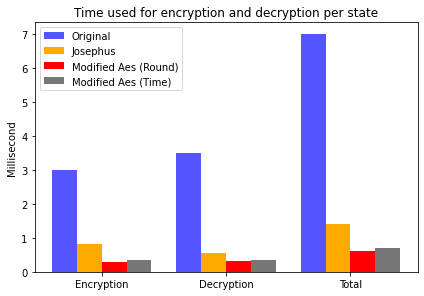

In [57]:
labels = ["Encryption", "Decryption", "Total"]
bar_width = 0.2

fig, ax = plt.subplots()
x = np.arange(len(labels))

ax.bar(x - 3*bar_width/2, 
       time_data_original.values(),
       bar_width, label='Original', color='#5555FF')
ax.bar(x - 1*bar_width/2,
       time_data_josephus.values(),
       bar_width, label='Josephus', color='#FFAA00')
ax.bar(x + 1*bar_width/2,
       time_data_modified_round.values(),
       bar_width, label='Modified Aes (Round)', color='#FF0000')
ax.bar(x + 3*bar_width/2,
       time_data_modified_time.values(),
       bar_width, label='Modified Aes (Time)', color='#777777')

ax.set_ylabel('Millisecond')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()

plt.title('Time used for encryption and decryption per state')
plt.show()

# Avalanche Analysis

## Data

In [31]:
avalanche_df = pd.read_csv("avalanche_data.csv")
avalanche_df["Original_AES_Avalanche"] = avalanche_df["Original_AES_Avalanche"].astype(float)*100
avalanche_df["Josephus_AES_Avalanche"] = avalanche_df["Josephus_AES_Avalanche"].astype(float)*100
avalanche_df["Modified_AES_Round_Avalanche"] = avalanche_df["Modified_AES_Round_Avalanche"].astype(float)*100
avalanche_df["Modified_AES_Time_Avalanche"] = avalanche_df["Modified_AES_Time_Avalanche"].astype(float)*100

In [32]:
avalanche_df[["Original_AES_Avalanche","Josephus_AES_Avalanche"]].describe().drop("count")

,Original_AES_Avalanche,Josephus_AES_Avalanche
mean,50.043203,49.882812
std,4.386369,4.427263
min,32.031250,3.906250
25%,46.875000,46.875000
50%,50.000000,50.000000
75%,53.125000,53.125000
max,67.187500,66.406250


In [35]:
avalanche_df.head(10)

,Plaintext_1,Plaintext_2,Original_AES_Ciphertext_1,Original_AES_Ciphertext_2,Original_AES_Avalanche,Josephus_AES_Ciphertext_1,Josephus_AES_Ciphertext_2,Josephus_AES_Avalanche,Modified_AES_Round_Ciphertext_1,Modified_AES_Round_Ciphertext_2,Modified_AES_Round_Avalanche,Modified_AES_Time_Ciphertext_1,Modified_AES_Time_Ciphertext_2,Modified_AES_Time_Avalanche
0,a;j#>\XP:|N<>B:M,aij#>\XP:|N<>B:M,ebb2f71ba0dc08ae4a302b4a3175cc7b,22c012961cde6686481f97bb872be441,48.43750,bb0495b0d37e6407cd571bc5282c233d,8711948fd11b4bd183579b4b86e24998,43.75000,90b0175a2f8165a8311713b85f3331d8,9051175a2f8165a8311713b85f3331d8,3.12500,23826eaf70de22a7e4c96a078484f13e,23b46eaf70de22a7e4c96a078484f13e,3.12500
1,<w8d|A;-S=d^}v[g,<w8d|c;-S=d^}v[g,1b2aa8dcebe9bca7bc474cba0b35c6d4,815b376c6fb665f1448a3185d57204e8,57.03125,11935ece04cc71512c00d09b7ebf54bc,73dfe9ed5fecacba761dfcf51d73a53a,50.78125,172d9c63e25c804482279f6126cfd5e2,172d9c63e287804482279f6126cfd5e2,4.68750,b3bd40ea365efb2a424abe3b7dbcb8fa,b3bd40ea6b5efb2a424abe3b7dbcb8fa,3.90625
2,"At(^TJ0""82BRER7C","At(^TJ0""82BRQR7C",e368eedce8a7836646ecfc494527e140,6835943a672f98cf3676ed9d002644c6,45.31250,e919b427fad4247183af5db57144dde9,c0fc088034463a590bf21c1af30f17b9,46.09375,d4bffc26214d162346d2ae96738b0347,d4bffc26214d162346d2ae961b8b0347,2.34375,0b6d2ee69fd4c64f7d35f74245c40f82,0b6d2ee69fd4c64f7d35f74245e40f82,0.78125
3,aF1TvB+fH4/FLb%/,aF1TvB+fH4/gLb%/,574a367789ff710b669c8df161d7e766,4c7aeb08f512a6a1c7f70dbfbab876d6,55.46875,1cdb334d9b494cc482c7b809b10a1e9e,02bf18717690073e4d1cccd2b11c9368,55.46875,9039d57738499ea230865fb0998e37ce,9039d57738499ea230865f59998e37ce,3.90625,23779de44798dab55642a9b36ea52b63,23779de44798dab5566ea9b36ea52b63,2.34375
4,?.Bgu?Vm;HIga0:L,?.\gu?Vm;HIga0:L,85d5a44d209c0b98c7b5452b173f9c80,987760b3bafa66284a64b9c5cc9e55ba,54.68750,a261aad2234a44b93d4b14fb009a345e,43ce01fd5e3de730bb2283f1a27ef5b2,53.12500,ef35ba58158541b5f8641659b74531bc,ef35a058158541b5f8641659b74531bc,2.34375,9cf36a7beb1035ebde6eecb480e25c3e,9cf37e7beb1035ebde6eecb480e25c3e,1.56250
5,T2pz*gXpx>uTK~v},T2pj*gXpx>uTK~v},b73a049487dee49d58feea1d064f14a9,13d528c743e46e4108330bc3b4201288,49.21875,48ee5a03cb3e22777f570aea3ab22df9,19a8e52428ca02a91a9f36bd7da815e2,50.00000,2213b5f9243d65779d9fc56d23741634,2213b50f243d65779d9fc56d23741634,4.68750,d0184b885bde15843f99f32cfd6da0be,d0184b675bde15843f99f32cfd6da0be,5.46875
6,"!7~{?MydE$6z""!It","!7~{?MydEo6z""!It",7270cba98d01a6438346541a258230a2,6136f7a30e0133d8e8830c3f24221af4,38.28125,93febced2787fe63e6877eb8c6dd090f,d090016774f0f2e4bf27a049a4ad3508,49.21875,db829e29fa0e284a6078e7bd440ac53f,db829e29fa0e284a60e0e7bd440ac53f,2.34375,fa7695b4d7a7369f0ddf7d4b9050555f,fa7695b4d7a7369f0ddf7d169050555f,3.90625
7,VF$jEq\9MWn=(_hU,VF$jEq\9Msn=(_hU,61f938abe9455af441b1fa11babc223e,a1aa533891a1dde035f14c2f0f619a1c,47.65625,a88d6a69ff94492d03aa1ecae24f5e0b,c5f69064176303eb173ebaaa36a3dce4,51.56250,5339b10fab86257910957423f77d99f7,5339b10fab86257910b77423f77d99f7,1.56250,ae77566738ac56d00b8367dd8d23cd17,ae77566738ac56d00b83675e8d23cd17,2.34375
8,R3OWF'N_R(psD1Ud,RJOWF'N_R(psD1Ud,2cecf37111c2625ea0f2c8b14299d86e,23a262f3b53aa973f58492e3eb96bf73,49.21875,bab67a37c1fcfe64ed8c65e627f11c20,02a462b9c202657f148ccc2d1c39bbe7,49.21875,670fdf2398eb833267cfb7f52a328fb1,6793df2398eb833267cfb7f52a328fb1,3.12500,c6130037957fc3f43043287d2dae118a,c6b90037957fc3f43043287d2dae118a,3.12500
9,"+rhHaei>Br""~zgcf","+rhHaei>Br""~Wgcf",cdd9c681e3925e26c04caf5bcfebf44b,a0dec2275df40e602528a8eb1344837c,50.00000,c55ec0981909f156bd7fc9e5954a19a7,bbd77401aa1b779bf6c5e06f70617bc4,49.21875,4f0b6c30b2906a676824b9aab9d9322e,4f0b6c30b2906a676824b9aab1d9322e,0.78125,c74ece151c916585cf09e8c1d41d07da,c74ece151c916585cf09e8c1d48307da,3.90625


In [ ]:
avalanche_df_mean = avalanche_df.mean()

## Text

In [ ]:
print("""
Original AES : {avalanche_df_mean['Original_AES_Avalanche']}%
Josephus AES
Modified AES (Round)
Modified AES (Time)
""")

## Graph

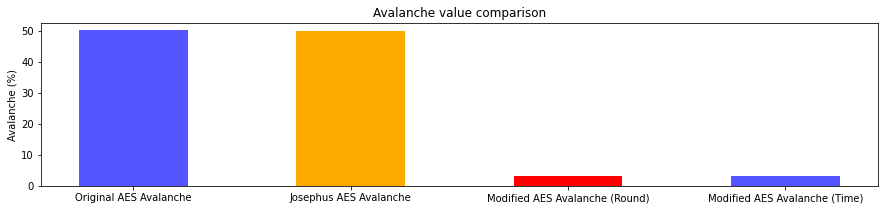

In [36]:
plt.figure(figsize=(15,3))
plt.bar(['Original AES Avalanche', 
         'Josephus AES Avalanche',
         'Modified AES Avalanche (Round)',
         'Modified AES Avalanche (Time)'],
        
        [avalanche_df_mean['Original_AES_Avalanche'],
        avalanche_df_mean['Josephus_AES_Avalanche'],
        avalanche_df_mean['Modified_AES_Round_Avalanche'],
        avalanche_df_mean['Modified_AES_Time_Avalanche']]
       ,color=['#5555FF','#FFAA00','#FF0000']
       ,width=0.5)
plt.ylabel('Avalanche (%)')
plt.title('Avalanche value comparison')
plt.show()

In [ ]:
avalanche_df_mean